# Problem Statement

There are "x" number of crashes per year in the City of Chicago costing "x" dollars. Can we predict where, when and why crashes are likely to occur and how severe they may be. This can help guide where should authorities focus their attention and money.

# Models Used
XGBoost
Random Forest

# Evaluation Criterion


In [2]:
%matplotlib inline
# Import a few necessary libraries to get started
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1. Data

In [22]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Import data file and create pandas data frame
raw_crash_df = pd.read_csv('../data/traffic_crashes_chicago.csv')
raw_crash_df

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,NaN,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,5,W,TERMINAL ST,1655.0,Y,Y,NaN,NaN,NaN,NaN,2,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902754,ede74fa6fd507334cd0415d3d53deb535d27d23523cd38...,NaN,06/23/2023 04:30:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NaN,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,$500 OR LESS,07/01/2023 01:15:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,6799,N,KEDZIE AVE,2412.0,NaN,NaN,NaN,NaN,NaN,NaN,2,INCAPACITATING INJURY,1.0,0.0,1.0,0.0,0.0,1.0,0.0,16,6,6,42.004564,-87.709200,POINT (-87.709200383599 42.004564031467)
902755,e88a7d78baea3f2de14f0042ce24937d03ca58553c7102...,NaN,10/23/2018 03:30:00 AM,30,LANE USE MARKING,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,CENTER TURN LANE,4.

Everything seems to have loaded in fine, so now I will dig in a little deeper on the data

In [8]:
raw_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902759 entries, 0 to 902758
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                902759 non-null  object 
 1   CRASH_DATE_EST_I               66646 non-null   object 
 2   CRASH_DATE                     902759 non-null  object 
 3   POSTED_SPEED_LIMIT             902759 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         902759 non-null  object 
 5   DEVICE_CONDITION               902759 non-null  object 
 6   WEATHER_CONDITION              902759 non-null  object 
 7   LIGHTING_CONDITION             902759 non-null  object 
 8   FIRST_CRASH_TYPE               902759 non-null  object 
 9   TRAFFICWAY_TYPE                902759 non-null  object 
 10  LANE_CNT                       199022 non-null  float64
 11  ALIGNMENT                      902759 non-null  object 
 12  ROADWAY_SURFACE_COND          

There are just over 900,000 entries. I see a few columns with low non-null values that may need to be removed.


Also, I see some columns that don't seem to add any value and those will need to be removed later as well.



But first I will check column headers for any potential issues in formatting

In [10]:
# Show all column names
raw_crash_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

Everything looks good. Now I will look at missing values totals and percentages for each column

In [12]:
# Define a function to calculate and show number and percentage of missing values for each feature
def missing_values_table(df):
    """ A function to calculated missing values counts and percentages"""
    
    # Calculate missing value counts and percentages
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': df.isnull().sum(),
        'Percentage Missing': df.isnull().mean() * 100
    })
    
    # Reset the index
    missing_data = missing_data.reset_index(drop=True)
    
    # Display the resulting table 
    print(missing_data)

missing_values_table(raw_crash_df)

                           Column  Missing Values  Percentage Missing
0                 CRASH_RECORD_ID               0            0.000000
1                CRASH_DATE_EST_I          836113           92.617520
2                      CRASH_DATE               0            0.000000
3              POSTED_SPEED_LIMIT               0            0.000000
4          TRAFFIC_CONTROL_DEVICE               0            0.000000
5                DEVICE_CONDITION               0            0.000000
6               WEATHER_CONDITION               0            0.000000
7              LIGHTING_CONDITION               0            0.000000
8                FIRST_CRASH_TYPE               0            0.000000
9                 TRAFFICWAY_TYPE               0            0.000000
10                       LANE_CNT          703737           77.954028
11                      ALIGNMENT               0            0.000000
12           ROADWAY_SURFACE_COND               0            0.000000
13                  

At this point, I will tidy up the data frame a bit by removing some columns will a large percentage of missing values as well as some columns that I don't think we need. 


Below is my reasoning for removing each column. There may be some columns that get dropped later as well, but this is just a preliminary drop.


Also, once my end data frame is set, I will include a justification on each column that I kept.



DESCRIPTIVE FEATURES REMOVED WITH REASONING:


'CRASH_RECORD_ID': Index-like feature. Not adding value


'CRASH_DATE_EST_I': Over 90% missing values. We also have crash month, day of week and hour later in the table.


'CRASH_DATE': Date information is included elsewhere in data frame in a more useable format


'REPORT_TYPE': Information from after crash


'NOT_RIGHT_OF_WAY_I': Over 95% missing values


'DATE_POLICE_NOTIFIED': Information from after crash


'STREET_NAME': If we decide to use this feature, we can capture it in the 'STREET_NUMBER' feature


'PHOTOS_TAKEN_I': Information from after crash and Over 95% missing values


'STATEMENTS_TAKEN_I': Information from after crash and Over 95% missing values


'DOORING_I': Information from after crash and Over 95% missing values


'WORK_ZONE_I': Over 95% missing values - Could be valid, but don't have a subject matter expert to consult


'WORK_ZONE_TYPE': Over 95% missing values - Could be valid, but don't have a subject matter expert to consult


'WORKERS_PRESENT_I': Over 95% missing values - Could be valid, but don't have a subject matter expert to consult


'NUM_UNITS': Information from after crash


'LOCATION': If we decide to use this feature, we can capture it in the 'BEAT_OF_OCCURRENCE' or 'STREET_NO' feature


'LATITUDE': If we decide to use this feature, we can capture it in the 'BEAT_OF_OCCURRENCE' or 'STREET_NO' feature


'LONGITUDE': If we decide to use this feature, we can capture it in the 'BEAT_OF_OCCURRENCE' or 'STREET_NO' feature


'INJURIES_UNKNOWN': Expansion of the target feature


'INJURIES_NO_INDICATION': Expansion of the target feature


'INJURIES_REPORTED_NOT_EVIDENT': Expansion of the target feature


'INJURIES_NON_INCAPACITATING': Expansion of the target feature


'INJURIES_INCAPACITATING': Expansion of the target feature


'INJURIES_FATAL': Expansion of the target feature


'INJURIES_TOTAL': Expansion of the target feature


'CRASH_TYPE': Includes target feature information


'LANE_CNT': Over 75% missing values


'INTERSECTION_RELATED_I':  - Could be valid, but don't have a subject matter expert to consult and Over 75% missing values


DESCRIPTIVE FEATURES REMOVED THAT MAY BE ADDED BACK LATER WITH REASONING:



'STREET_NO'



In [24]:
# Make a list of columns to drop from Data Frame
# Rationale for dropping of columns in markdown above
columns_to_drop = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I','CRASH_DATE', 'REPORT_TYPE', 'NOT_RIGHT_OF_WAY_I',
                   'DATE_POLICE_NOTIFIED', 'STREET_NAME','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 
                   'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS','LATITUDE', 'LONGITUDE',
                   'LOCATION', 'STREET_NO', 'INJURIES_UNKNOWN', 'INJURIES_NO_INDICATION',
                   'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NON_INCAPACITATING', 'INJURIES_INCAPACITATING',
                   'INJURIES_FATAL', 'INJURIES_TOTAL', 'CRASH_TYPE', 'LANE_CNT', 'INTERSECTION_RELATED_I',
                   ]
# Create copy and drop columns from Data Frame
crash_df_1 = raw_crash_df.copy()
crash_df_1 = raw_crash_df.drop(columns_to_drop, axis=1)

Now lets look at some descriptive basic statistics for our features

In [27]:
# Basic statistics of features
print("\nDescriptive Statistics:")
crash_df_1.describe().T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
POSTED_SPEED_LIMIT,902759.0,28.422009,6.104456,0.0,30.0,30.0,30.0,99.0
BEAT_OF_OCCURRENCE,902754.0,1245.657858,704.805370,111.0,715.0,1212.0,1822.0,6100.0
CRASH_HOUR,902759.0,13.200535,5.572040,0.0,9.0,14.0,17.0,23.0
CRASH_DAY_OF_WEEK,902759.0,4.119660,1.981007,1.0,2.0,4.0,6.0,7.0
CRASH_MONTH,902759.0,6.746515,3.387002,1.0,4.0,7.0,10.0,12.0


Some of these features seem to have a pretty high number of categories. 


Let's dig a little deeper and take a look at the value counts for each feature

In [29]:
for column in crash_df_1.columns:
    print(crash_df_1[column].value_counts(), "\n")

POSTED_SPEED_LIMIT
30    665023
35     59697
25     57886
20     37764
15     32163
10     21121
40      8635
0       7588
45      5964
5       4960
55       884
50       276
3        221
9         96
39        95
99        66
60        53
1         41
24        38
2         31
65        20
32        20
34        16
33        14
11        11
26        11
36         8
6          7
70         7
7          6
18         4
12         4
22         4
14         4
23         3
29         3
31         2
8          2
38         2
16         2
4          2
62         1
63         1
44         1
49         1
46         1
Name: count, dtype: int64 

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 510974
TRAFFIC SIGNAL              250268
STOP SIGN/FLASHER            89487
UNKNOWN                      38422
OTHER                         6103
YIELD                         1368
LANE USE MARKING              1226
OTHER REG. SIGN               1104
OTHER WARNING SIGN             716
PEDESTRIAN CROSSI

Looking at the value counts for these features, the four that jump out to me are:

'POSTED_SPEED_LIMIT': High cardinality. Also, posted speed limits tend to end in '5' or '0' but I see a large number of other values

'PRIM_CONTRIBUTORY_CAUSE': High cardinality

'SEC_CONTRIBUTORY_CAUSE': High cardinality

'HIT_AND_RUN_I': Large percentage of missing values

According to the Illinois Department of Transportation,
POLICY ON ESTABLISHING AND POSTING SPEED LIMITS ON THE
STATE HIGHWAY SYSTEM
ILLINOIS DEPARTMENT OF TRANSPORTATION – BUREAU OF OPERATIONS
APPLICATION OF POLICY TO CITIES, COUNTIES AND OTHER LOCAL AGENCIES
https://safety.fhwa.dot.gov/speedmgt/ref_mats/fhwasa1304/resources2/22%20-%20Policy%20on%20Establishing%20and%20Posting%20Speed%20Limits%20on%20the%20State%20Highway%20System.pdf

There are set speed limits that always end in increments of 5. 

I will remove instances not ending in increments of '5' as well as instances where the posted speed limit is '0' as that seems to not be a valid speed limit.

For the Primary and Secondary Contributory causes, while the cardinality is high, it seems that these are vital information for the model. 

Therefore, I will not make any changes at this point.

For 'HIT_AND_RUN_I': This one was very interesting to me. I don't have a subject matter expert on hand to ask about this number, but when I initially looked at the distribution of Yes versus No on hit and runs I wondered if it were possible that the Yes values were valid in that police only reported 'Yes' values of hit and run and otherwise, generally left the category blank. So I did some internet sleuthing to find out in general what percentages of all crashes are hit and runs in the US. It was fairly difficult to find exact data for this, but every value I found was far below the ~23% that we see in this data. It was much easier to locate percentages of fatalities that were hit and runs. Those values tended to be either below or in range of the ~23% value that we see in our data. Therefore, I am going to go with the assumption that the 'Yes' values on 'HIT_AND_RUN_I' are valid and impute all null values with a 'No' value.


In [31]:
# Filter the DataFrame to keep only rows where POSTED_SPEED_LIMIT ends in '5' or '0'
crash_df_1 = crash_df_1[crash_df_1['POSTED_SPEED_LIMIT'].astype(str).str.endswith(('5', '0'))]

# Filter the DataFrame to keep only rows where POSTED_SPEED_LIMIT ends in '5' or '0', but exclude the value '0'
crash_df_1['POSTED_SPEED_LIMIT'] = crash_df_1['POSTED_SPEED_LIMIT'].astype(str)
crash_df_1 = crash_df_1[
    crash_df_1['POSTED_SPEED_LIMIT'].astype(str).str.endswith(('5', '0')) & 
    (crash_df_1['POSTED_SPEED_LIMIT'].astype(str) != '0')
]

# Reset the index
crash_df_1 = crash_df_1.reset_index(drop=True)

# Print value counts to check
print(crash_df_1['POSTED_SPEED_LIMIT'].value_counts())


POSTED_SPEED_LIMIT
30    665023
35     59697
25     57886
20     37764
15     32163
10     21121
40      8635
45      5964
5       4960
55       884
50       276
60        53
65        20
70         7
Name: count, dtype: int64


In [33]:
# Replace null values in 'HIT_AND_RUN_I' with 'N'
crash_df_1['HIT_AND_RUN_I'] = crash_df_1['HIT_AND_RUN_I'].fillna('N')

# Print value counts to check
print(crash_df_1['HIT_AND_RUN_I'].value_counts())

HIT_AND_RUN_I
N    625988
Y    268465
Name: count, dtype: int64


Let's see what our missing values percentages and descriptive statistics look like now.

In [36]:
# Print missing value percentages
#missing_values_table(df)

# Basic statistics of features
print("\nDescriptive Statistics:")
crash_df_1.describe().T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
BEAT_OF_OCCURRENCE,894448.0,1246.566207,704.508789,111.0,722.0,1212.0,1822.0,6100.0
CRASH_HOUR,894453.0,13.206296,5.576001,0.0,9.0,14.0,17.0,23.0
CRASH_DAY_OF_WEEK,894453.0,4.119680,1.981118,1.0,2.0,4.0,6.0,7.0
CRASH_MONTH,894453.0,6.747561,3.386404,1.0,4.0,7.0,10.0,12.0


There are only two categories remaining that have any missing values.

Since the total percentage missing is under 1/4 of a percentage of the entire dataset, I am just going to delete any remaining instances that have missing values.

In [39]:
# Drop all rows with null values
crash_df_2 = crash_df_1.dropna()

# Reset the index after dropping rows
crash_df_2 = crash_df_2.reset_index(drop=True)

# Verify the changes
print(crash_df_2.info())  # Check for nulls and the new shape of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892488 entries, 0 to 892487
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       892488 non-null  object 
 1   TRAFFIC_CONTROL_DEVICE   892488 non-null  object 
 2   DEVICE_CONDITION         892488 non-null  object 
 3   WEATHER_CONDITION        892488 non-null  object 
 4   LIGHTING_CONDITION       892488 non-null  object 
 5   FIRST_CRASH_TYPE         892488 non-null  object 
 6   TRAFFICWAY_TYPE          892488 non-null  object 
 7   ALIGNMENT                892488 non-null  object 
 8   ROADWAY_SURFACE_COND     892488 non-null  object 
 9   ROAD_DEFECT              892488 non-null  object 
 10  HIT_AND_RUN_I            892488 non-null  object 
 11  DAMAGE                   892488 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE  892488 non-null  object 
 13  SEC_CONTRIBUTORY_CAUSE   892488 non-null  object 
 14  STRE

Everything looks good! Now I will take a look at bar graphs of each of the features

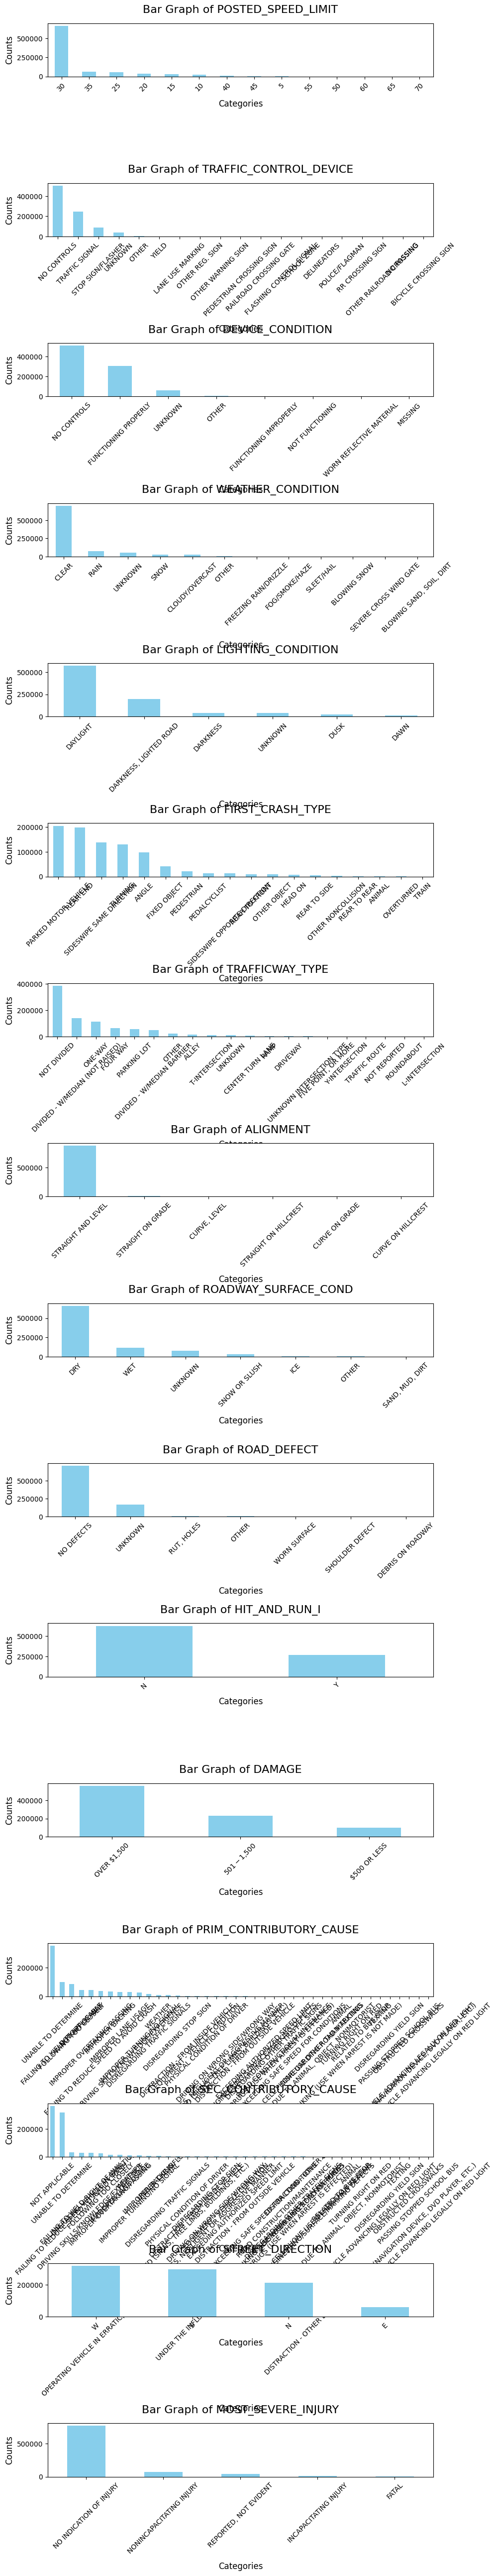

In [42]:
# Select all categorical columns
categorical_columns = crash_df_2.select_dtypes(include=['string', 'object']).columns

# Set up the figure
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 4))

# Plot each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i] if len(categorical_columns) > 1 else axes  # Handle single-column case
    crash_df_2[column].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Bar Graph of {column}', fontsize=16, pad=15)  # Add padding to the title
    ax.set_xlabel('Categories', fontsize=12, labelpad=10)  # Add padding to the x-axis label
    ax.set_ylabel('Counts', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=2.0)  # Increase the height between plots

# Display the plots
plt.show()


The largest thing to note here is the unbalanced nature of my target feature 'MOST_SEVERE_INJURY'.

Random Forest

XGBoost

SVM

stratified sampling

k-fold sampling

Over-sampling/Under-sampling

Deep Learning model(almost 1 million instances)


In [45]:
# Define the file path relative to the notebook
file_path = '../saves/data/cleaned_data.csv'

# Save the DataFrame to the specified path
crash_df_2.to_csv(file_path, index=False)

# Confirm the save
print(f"DataFrame saved to '{file_path}'")

DataFrame saved to '../saves/data/cleaned_data.csv'


As we prepare to encode our features, I will identify which categories are nominal categorical vs. ordinal categorical features.

Here is a reminder of our data.

In [48]:
# Change all values to categorical
crash_df_1 = crash_df_1.astype('category')

In [50]:
# Separate target feature(y) and descriptive features(X)
y = crash_df_2['MOST_SEVERE_INJURY']
X = crash_df_2.drop(['MOST_SEVERE_INJURY'], axis=1)

# Identify types of categorical features and their constituent features so that we can properly encode them later
ordinal_cat = ['POSTED_SPEED_LIMIT', 'DAMAGE',] # Ordinal encoding
cyclic_cat = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'] # sin/cos cyclic encoding
nominal_cat = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', # one-hot encoding
              'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
              'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION']
columns = cyclic_cat + nominal_cat

In [52]:
sl_cats = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70']
dam_cats = ['$500 OR LESS', '$501 - $1,500', 'OVER $1,500']


"""
Try the following models:

Random Forest - no cyclic encoding of date features. ordinal instead

XGBoost - no cyclic encoding of date features. ordinal instead

SVM - cyclic encoding of date featues

Naive Bayes Classification - cyclic encoding of date featues

Decision Tree - no cyclic encoding of date features. ordinal instead

kNN
"""

In [55]:
crash_df_2

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,BEAT_OF_OCCURRENCE,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,W,1654.0,NONINCAPACITATING INJURY,12,6,8
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,Y,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",S,1235.0,NO INDICATION OF INJURY,14,7,7
2,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,N,1633.0,NONINCAPACITATING INJURY,17,6,8
3,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,DRY,NO DEFECTS,N,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,W,1655.0,FATAL,8,3,11
4,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,W,1653.0,NO INDICATION OF INJURY,10,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892483,30,UNKNOWN,UNKNOWN,UNKNOWN,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,N,$500 OR LESS,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,N,2412.0,INCAPACITATING INJURY,16,6,6
892484,30,LANE USE MARKING,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,CENTER TURN LANE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",IMPROPER LANE USAGE,DISTRACTION - FROM INSIDE VEHICLE,W,1822.0,NO INDICATION OF INJURY,3,3,10
892485,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,S,613.0,NO INDICATION OF INJURY,16,2,6
892486,30,UNKNOWN,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,N,"OVER $1,500",IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,W,813.0,NO INDICATION OF INJURY,14,3,7


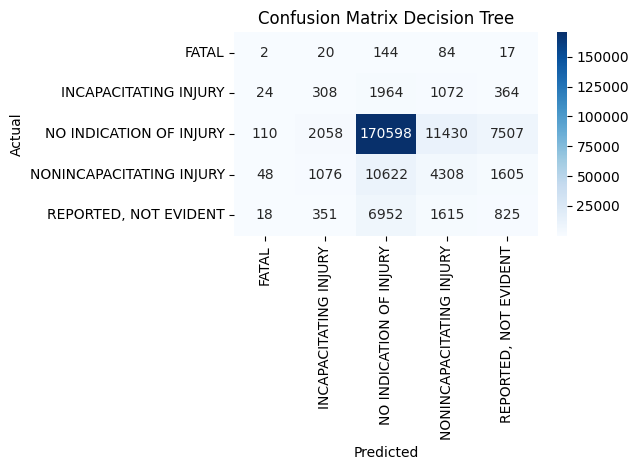

Decision Tree:
 Accuracy: 0.7890, Precision: 0.7936,     Recall: 0.7890, F1 Score: 0.7913

Confusion Matrix (as table):
                                  Predicted: FATAL  \
Actual: FATAL                                    2   
Actual: INCAPACITATING INJURY                   24   
Actual: NO INDICATION OF INJURY                110   
Actual: NONINCAPACITATING INJURY                48   
Actual: REPORTED, NOT EVIDENT                   18   

                                  Predicted: INCAPACITATING INJURY  \
Actual: FATAL                                                   20   
Actual: INCAPACITATING INJURY                                  308   
Actual: NO INDICATION OF INJURY                               2058   
Actual: NONINCAPACITATING INJURY                              1076   
Actual: REPORTED, NOT EVIDENT                                  351   

                                  Predicted: NO INDICATION OF INJURY  \
Actual: FATAL                                                 

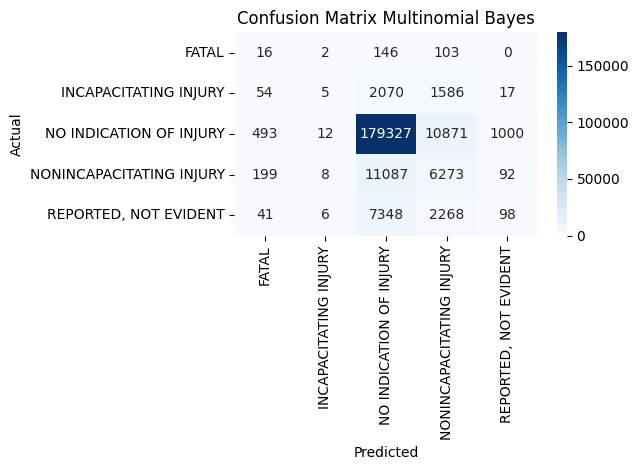

Multinomial Bayes:
 Accuracy: 0.8324, Precision: 0.8001,     Recall: 0.8324, F1 Score: 0.8132

Confusion Matrix (as table):
                                  Predicted: FATAL  \
Actual: FATAL                                   16   
Actual: INCAPACITATING INJURY                   54   
Actual: NO INDICATION OF INJURY                493   
Actual: NONINCAPACITATING INJURY               199   
Actual: REPORTED, NOT EVIDENT                   41   

                                  Predicted: INCAPACITATING INJURY  \
Actual: FATAL                                                    2   
Actual: INCAPACITATING INJURY                                    5   
Actual: NO INDICATION OF INJURY                                 12   
Actual: NONINCAPACITATING INJURY                                 8   
Actual: REPORTED, NOT EVIDENT                                    6   

                                  Predicted: NO INDICATION OF INJURY  \
Actual: FATAL                                             

In [57]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Encode the target label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Create sin/cos transformer functions for cyclical time based encoding of categorical data
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

#https://scikit-learn.org/1.5/auto_examples/applications/plot_cyclical_feature_engineering.html
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')


# Create preprocessor for models that DO NOT need cyclic encoding of time based features
non_cyclic_preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, columns),
        ("ord1", OrdinalEncoder(categories=[sl_cats]), ['POSTED_SPEED_LIMIT']),
        ("ord2", OrdinalEncoder(categories=[dam_cats]), ['DAMAGE']),
    ],
    remainder='passthrough',
)

# Create preprocessor for models that DO need cyclic encoding of time based features
cyclic_preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", one_hot_encoder, nominal_cat),
        ("ord1", OrdinalEncoder(categories=sl_cats), ['POSTED_SPEED_LIMIT']),
        ("ord2", OrdinalEncoder(categories=dam_cats), ['DAMAGE']),
        ("month_sin", sin_transformer(12), ['CRASH_MONTH']),
        ("month_cos", cos_transformer(12), ['CRASH_MONTH']),
        ("weekday_sin", sin_transformer(7), ['CRASH_DAY_OF_WEEK']),
        ("weekday_cos", cos_transformer(7), ['CRASH_DAY_OF_WEEK']),
        ("hour_sin", sin_transformer(24), ['CRASH_HOUR']),
        ("hour_cos", cos_transformer(24), ['CRASH_HOUR']),
    ],
    remainder='passthrough',
)


def create_pipeline(model, preprocessor):
    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Multinomial Bayes': MultinomialNB(),
    #'KNN': KNeighborsClassifier(n_neighbors=1),
}


# Define an evaluation function that wraps up fitting, metrics 
# and plotting confusion matrix
def evaluate_model(name, model, X_train, X_test, y_train, y_test, class_labels):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Plot confusion matrix for each model
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix {name}')
    plt.tight_layout()
    plt.show()
    
    # Print metrics results
    print(f"{name}:\n Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, \
    Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")
    
    # Create a DataFrame with class labels as index and column names
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=[f'Actual: {label}' for label in class_labels], 
                                  columns=[f'Predicted: {label}' for label in class_labels])
    
    # Display the DataFrame
    print("Confusion Matrix (as table):")
    print(conf_matrix_df)

# Loop through models, build pipelines, and evaluate
class_labels = label_encoder.classes_  # Get original class names

for name, model in models.items():
    pipeline = create_pipeline(model, non_cyclic_preprocessor)
    evaluate_model(name, pipeline, X_train, X_test, y_train, y_test, class_labels)

